In [ ]:
from keras.datasets.mnist import load_data
(x_train, y_train), (x_test, y_test) = load_data()

11493376/11490434 [==============================] - 50s 4us/step


In [4]:
print("訓練資料維度", x_train.shape)
print("測試資料維度", x_test.shape)

訓練資料維度 (60000, 28, 28)
測試資料維度 (10000, 28, 28)


45628
ANS: 3


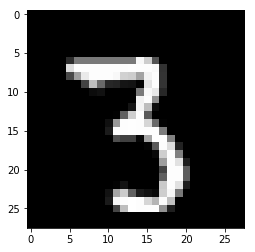

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0,59999)
print("ANS:", y_train[c])
plt.imshow(x_train[c], cmap="gray")

In [6]:
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,70,95,95,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,53,241,252,254,255,...,55,0,0,0,0,0,0,0,0,0
8,0,0,0,0,54,163,171,233,254,254,...,234,188,96,0,0,0,0,0,0,0
9,0,0,0,0,179,51,34,249,254,247,...,247,254,221,29,0,0,0,0,0,0


In [9]:
# 整理一下
# x進去之前一定要常態化(好配合keras一開始隨機的那組weights)
# 還要攤開
x_train_shape = x_train.reshape(60000, 784) / 255
x_test_shape = x_test.reshape(10000,784) /255
# y進去的時候要one-hot enconing 3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
#show
y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [15]:
from keras.models import Sequential
from keras.layers import Dense
mlp = Sequential()
# 第一個中間層, 一定要告訴多少個輸入(input_dim)
mlp.add(Dense(128, input_dim=784, activation="relu"))
mlp.add(Dense(10, activation="softmax"))
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [16]:
# 訓練前: 確定模型訓練方式
# 回歸: mse, 二元分類(output:1):binary_crossentropy, 多元分類(output > 1):categorical_crossentropy
mlp.compile(optimizer="adam", 
            loss="categorical_crossentropy",
            metrics=["accuracy"])

In [17]:
# batch:看幾張圖做一次梯度下降
# epochs: 整個資料集看幾次
# epoch = 10, batch=200, 60000 * 10 / 200 = 3000 梯度下降
mlp.fit(x_train_shape,
        y_train_cat, 
        batch_size=200, 
        epochs=15,
        validation_split=0.1,
        verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
 - 1s - loss: 0.4341 - acc: 0.8813 - val_loss: 0.2082 - val_acc: 0.9437
Epoch 2/15
 - 1s - loss: 0.2084 - acc: 0.9410 - val_loss: 0.1455 - val_acc: 0.9622
Epoch 3/15
 - 1s - loss: 0.1566 - acc: 0.9554 - val_loss: 0.1208 - val_acc: 0.9663
Epoch 4/15
 - 1s - loss: 0.1219 - acc: 0.9654 - val_loss: 0.0990 - val_acc: 0.9730
Epoch 5/15
 - 1s - loss: 0.1001 - acc: 0.9714 - val_loss: 0.0900 - val_acc: 0.9747
Epoch 6/15
 - 1s - loss: 0.0835 - acc: 0.9760 - val_loss: 0.0913 - val_acc: 0.9742
Epoch 7/15
 - 1s - loss: 0.0718 - acc: 0.9794 - val_loss: 0.0783 - val_acc: 0.9773
Epoch 8/15
 - 1s - loss: 0.0619 - acc: 0.9823 - val_loss: 0.0787 - val_acc: 0.9763
Epoch 9/15
 - 1s - loss: 0.0541 - acc: 0.9846 - val_loss: 0.0783 - val_acc: 0.9787
Epoch 10/15
 - 1s - loss: 0.0472 - acc: 0.9872 - val_loss: 0.0728 - val_acc: 0.9780
Epoch 11/15
 - 1s - loss: 0.0409 - acc: 0.9887 - val_loss: 0.0765 - val_acc: 0.9787
Epoch 12/15
 - 1s - loss: 0.0361 - a

In [18]:
mlp.evaluate(x_test_shape, y_test_cat)

10000/10000 [==============================] - 0s 18us/step


[0.07370994943187106, 0.977]

In [19]:
from sklearn.metrics import confusion_matrix
import pandas as pd
pd.DataFrame(confusion_matrix(y_test, mlp.predict_classes(x_test_shape)))

,0,1,2,3,4,5,6,7,8,9
0,967,0,1,2,1,1,2,1,4,1
1,1,1125,3,1,0,1,2,0,2,0
2,5,1,1006,4,2,0,3,2,9,0
3,0,0,2,991,0,3,0,5,5,4
4,0,0,1,1,962,0,5,1,1,11
5,3,0,0,11,1,864,3,1,5,4
6,5,3,1,1,5,4,937,0,2,0
7,0,3,10,4,0,1,0,996,6,8
8,3,0,2,9,2,4,1,3,948,2
9,1,5,0,9,11,1,1,4,3,974


想要判斷的圖片名稱:mlptest.png
預測結果: [5]


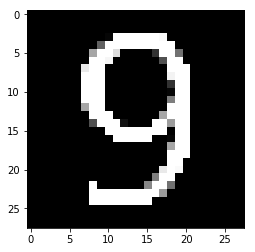

In [24]:
# Pillow
from PIL import Image
import numpy as np
fn = input("想要判斷的圖片名稱:")
img1 = np.array(Image.open(fn).resize((28,28)).convert("L"))
x_pre = np.array([img1]).reshape(1, 784) / 255
print("預測結果:", mlp.predict_classes(x_pre))
plt.imshow(img1, cmap="gray")